In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from GRN.src.GRN_aux_5 import get_results_new as get_grn5_results
from GRN.src.GRN_aux_10 import get_results as get_grn10_results

Comparação entre os melhores resultados obtidos pelo José Eduardo e os meus usando LSODA e o RK4

In [2]:

def plot_comp(time_points, individuals, labels, chart_name, output_file):
    #print(original)
    #print(new)

    fig, ax = plt.subplots(1, 1)
    
    for i in range(len(individuals)):
        ax.plot(time_points, individuals[i], label=labels[i], marker="")

    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.title(chart_name)
    if output_file:
        plt.savefig(f"{chart_name}.png")
    plt.show()


def get_real_values(file_name, num_var):
    all_values = [[] for _ in range(num_var)]
    x = []
    with open(file_name, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quotechar='\'')
        
        for row in reader:
            x.append(float(row[0]))

            for i in range(num_var):
                all_values[i].append(float(row[i+1]))
                #values[i].append(float(row[i+1]))
                
    return x, all_values       

def avg_from_file(filepath):
   with open(filepath, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='\'')
    sum =0;
    row_0 = list(reader)[0];
    empty_cells = 0
    for value in row_0:
        if value == '':
            empty_cells += 1
        else:
            sum += float(value)

    return sum/(len(row_0) - empty_cells)

## 5 variáveis

In [3]:
print(f"Average time for each run (LSODA - GRN5): {avg_from_file('../results/exp15/grn5-lsoda-30runs-200000evals -time.csv')}")

print(f"Average time for each run (LSODA - GRN10): {avg_from_file('../results/exp15/grn10-lsoda-30runs-200000evals -time.csv')}")

print(f"Average time for each run (RK4 - GRN5): {avg_from_file('../results/exp15/grn5-rk4-30runs-200000evals -time.csv')}")

print(f"Average time for each run (RK4 - GRN10): {avg_from_file('../results/exp15/grn10-rk4-30runs-200000evals -time.csv')}")

Average time for each run (LSODA - GRN5): 321.1
Average time for each run (LSODA - GRN10): 2349.4333333333334
Average time for each run (RK4 - GRN5): 2263.8333333333335
Average time for each run (RK4 - GRN10): 11372.857142857143


Melhor resultado do JE: 
26.921031709661378
Melhor resultado do LSODA: 
23.84660603605667
Melhor resultado do RK4: 
24.18079345568902


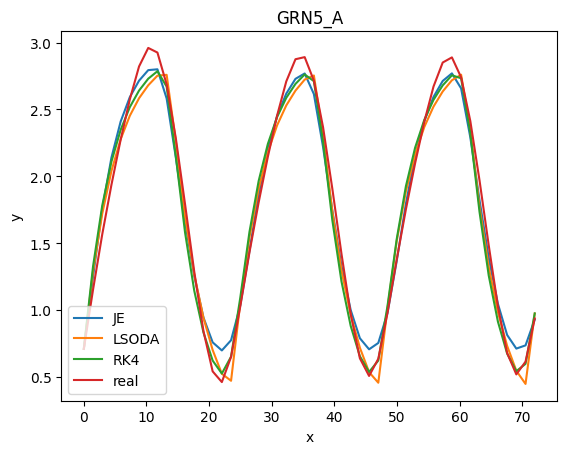

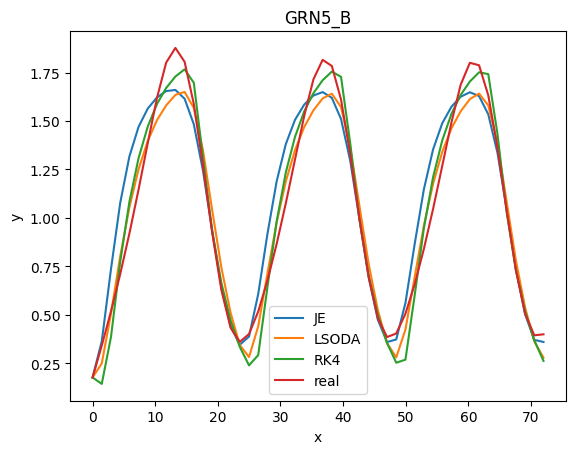

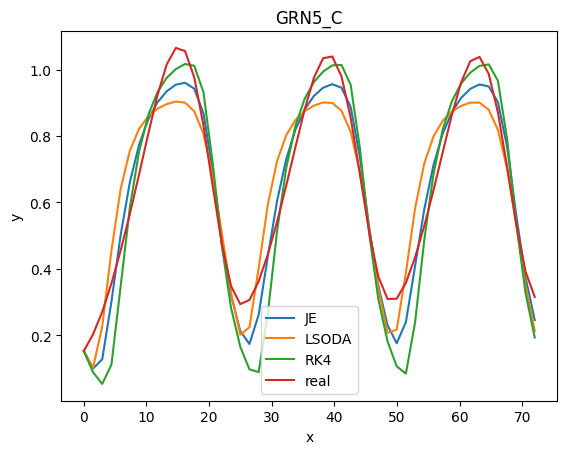

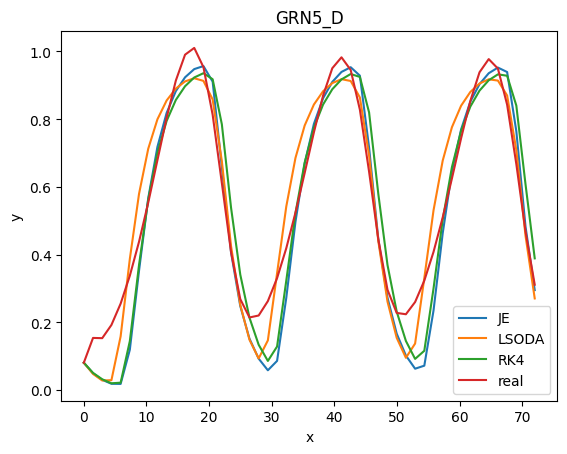

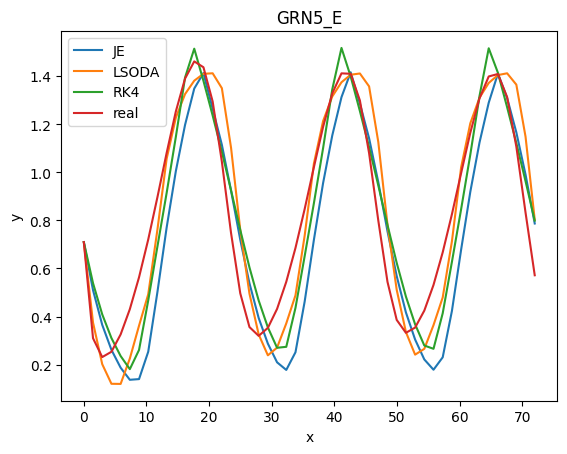

In [4]:

time_points, real_values = get_real_values('GRN5.txt', 5)

grn5JE = {'dim': [1.2163355099083872, 1.1264485098219865, 2.973714367061704,2.952143123315177, 2.998260518457365, 0.5687249950503857,0.4580723119903261, 0.46214892372246563, 0.6182568295500336,0.5213082492659304, 0.7708877748759901, 0.1497642024548283,4.254757908429968, 3.759370669969996, 4.784173526119725,10.935884810737809, 24.595975874929724, 2.8109199678182635, 4.922623602327875]}

grn5LSODA = {'dim': [1.665646732900410,1.897082684353816,0.975275873852489,2.754224014420573,1.488627162874155,0.752016124775905,0.495947143189699,0.368164433824998,0.583010534063372,0.205779564337342,0.936697961205079,0.400650164836070,24.067578711761704,4.637921569111548,2.354220086101498,7.573632383254259,8.917490424828676,1.877741133565334,11.860179163338651]}

grn5RK4 = {'dim': [1.518554824237679,2.284887473830299,2.531733480619191,3.101832922846902,3.654114122147231,0.639299087190237,0.527395640667198,0.449695328381246,0.515082711535552,0.768632056509851,0.146877830910628,0.862094052969164,11.633621817985625,11.610292860148797,5.901302837857914,5.849849277135502,19.589630238693416,7.525159048136441,4.056707716932873]}


real_A, real_B, real_C, real_D, real_E = real_values
print("Melhor resultado do JE: ");
JE_A, JE_B, JE_C, JE_D, JE_E = get_grn5_results(grn5JE['dim'])
print("Melhor resultado do LSODA: ");
LSODA_A,LSODA_B,LSODA_C,LSODA_D,LSODA_E = get_grn5_results(grn5LSODA['dim'])
print("Melhor resultado do RK4: ");
RK4_A,RK4_B,RK4_C,RK4_D,RK4_E = get_grn5_results(grn5RK4['dim'])
labels = ["JE", "LSODA", "RK4", "real"]

plot_comp(time_points, [JE_A, LSODA_A, RK4_A, real_A], labels, "GRN5_A", False)
plot_comp(time_points, [JE_B, LSODA_B, RK4_B, real_B], labels, "GRN5_B", False)
plot_comp(time_points, [JE_C, LSODA_C, RK4_C, real_C], labels, "GRN5_C", False)
plot_comp(time_points, [JE_D, LSODA_D, RK4_D, real_D], labels, "GRN5_D", False)
plot_comp(time_points, [JE_E, LSODA_E, RK4_E, real_E], labels, "GRN5_E", False)



## 10 variáveis

Melhor resultado do JE: 
56.74712045779758
Melhor resultado do LSODA: 
54.211288148741005
Melhor resultado do RK4: 
53.795738844906275


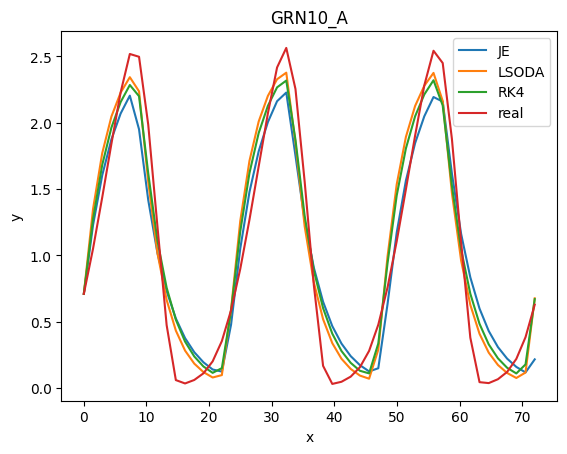

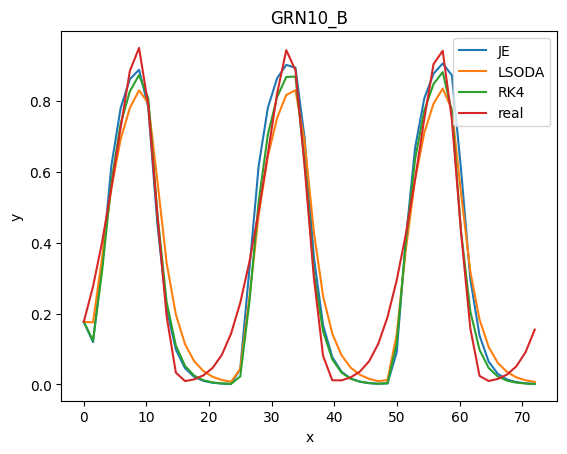

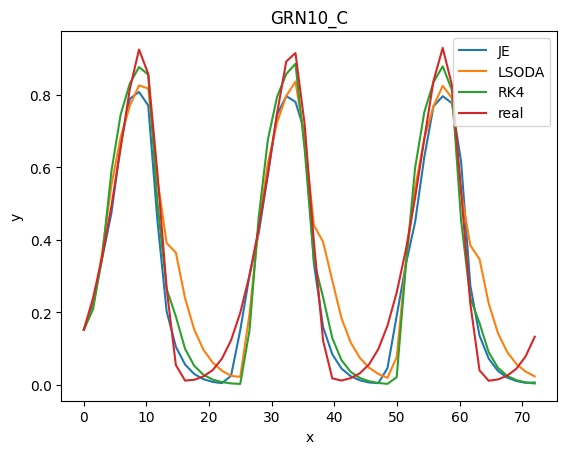

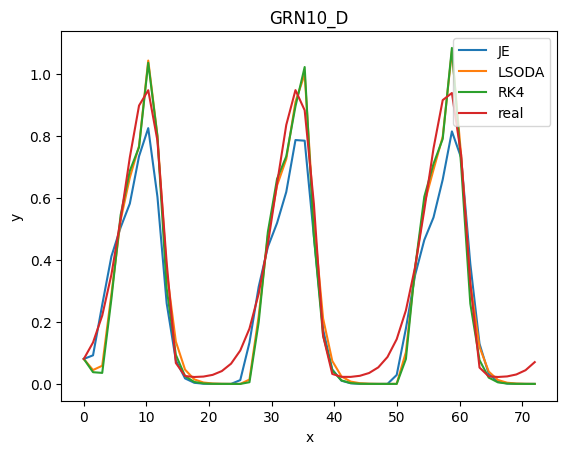

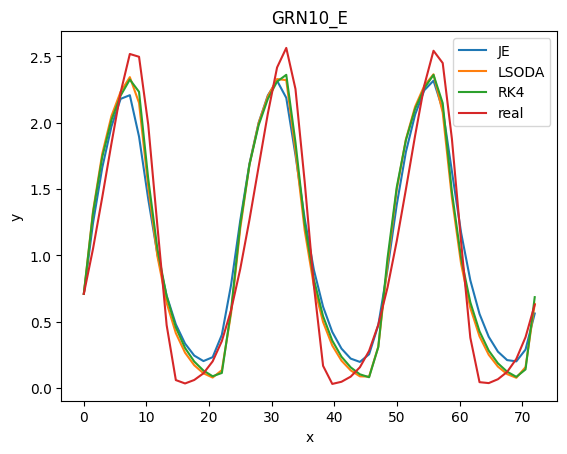

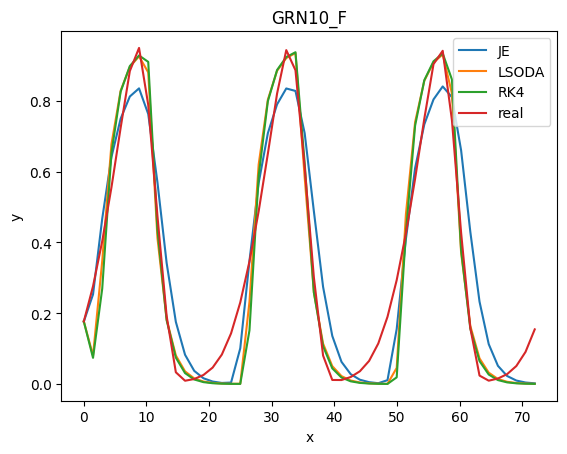

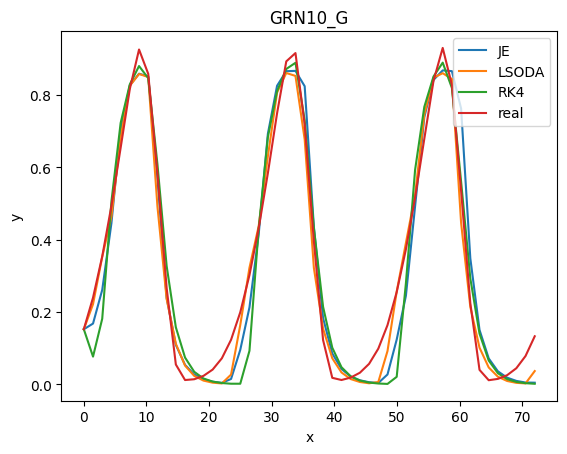

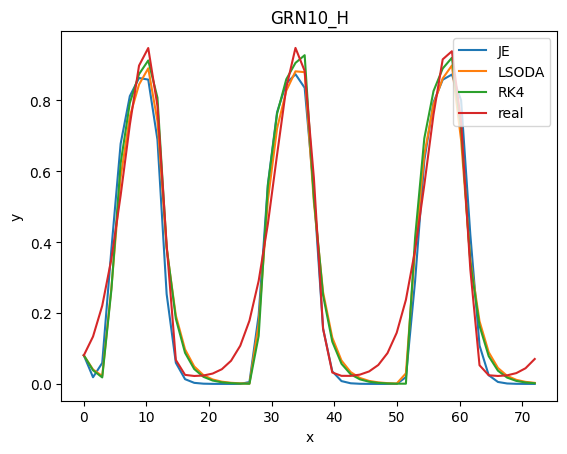

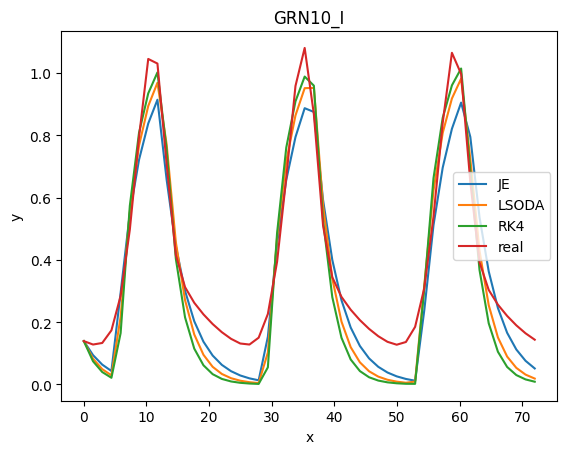

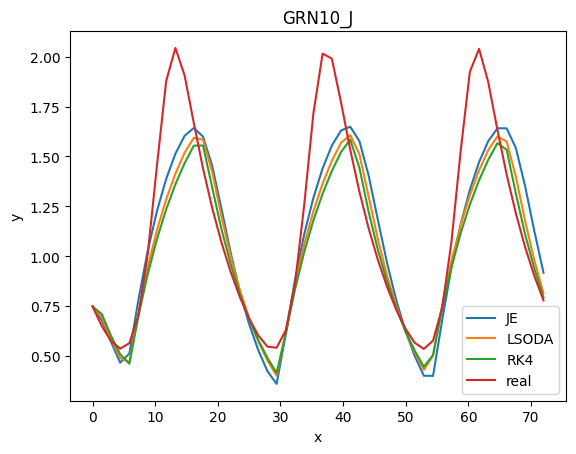

In [5]:
time_points, real_values = get_real_values('GRN10.txt', 10)

grn10JE = {'dim': [1.73, 2, 0.81, 0.11, 1.23, 1.78,
                   1.14, 1.04, 3.47, 3.21, 0.45,
                   0.56, 0.99, 0.77, 0.71, 0.66,
                   0.46, 0.48, 0.66, 0.99, 0.85,
                   0.61, 0.55, 0.46, 0.17, 20,
                   9, 24, 12, 2, 2, 6, 4, 7,
                   24, 2, 7, 21, 20, 3]}

grn10LSODA = {'dim': [1.341477484494165, 2.781988058549157, 3.490801172024773, 1.257405539049150, 1.297877597005905,
                      1.894733240422617, 1.195647059919179, 2.270689758542591, 2.600165483392267, 3.875174338136099,
                      0.453263240515180, 0.555610042754187, 0.285563160958080, 0.149847316813419, 0.595921539913905,
                      0.548793613457920, 0.445576631784505, 0.611426963353202, 0.963894321103912, 0.800389957453789,
                      0.726097076792202, 0.556277329691692, 0.347780603967589, 0.496289170889362, 0.141357730089877,
                      21.337791438025970, 6.605888183782290, 9.526528498220566, 5.107497299110702, 12.852852358990023,
                      2.913101110229551, 14.518643891321348, 23.433342043901426, 17.753610354070797, 15.274313164854433,
                      2.474490287268817, 8.562945910662774, 18.767135978268104, 10.472219420614113, 4.679502740145083
                      ]}

grn10RK4 = {'dim': [1.489329188828929, 2.062827136863578, 2.466693136996797, 1.008970881722796, 1.383377856627157,
                    1.751599284440565, 2.067563102458654, 2.095762844223213, 2.167467614156068, 4.270428933060529,
                    0.439420794498028, 0.602011679139360, 0.181558466954136, 0.130421029101338, 0.617069980996292,
                    0.561966784806900, 0.438473280184997, 0.606482192840012, 0.775841692624209, 0.737890971748534,
                    0.643435464700540, 0.541978986016550, 0.337217522924080, 0.585893978842659, 0.115420565073943,
                    18.319872668579741, 8.082141746085680, 24.474344769568872, 18.734592194320075, 17.869240614166248,
                    2.941831945890582, 21.465083399236817, 23.021345075873931, 3.796594597764678, 21.391040597238053,
                    14.727404404753924, 24.954599191392553, 14.635733373140352, 14.765589037867480, 7.675430056421228
                    ]}

real_A, real_B, real_C, real_D, real_E, real_F, real_G, real_H, real_I, real_J = real_values
print("Melhor resultado do JE: ")
JE_A, JE_B, JE_C, JE_D, JE_E, JE_F, JE_G, JE_H, JE_I, JE_J  = get_grn10_results(grn10JE['dim'])
print("Melhor resultado do LSODA: ")
LSODA_A,LSODA_B,LSODA_C,LSODA_D,LSODA_E, LSODA_F, LSODA_G, LSODA_H, LSODA_I, LSODA_J = get_grn10_results(grn10LSODA['dim'])
print("Melhor resultado do RK4: ")
RK4_A,RK4_B,RK4_C,RK4_D,RK4_E, RK4_F, RK4_G, RK4_H, RK4_I, RK4_J = get_grn10_results(grn10RK4['dim'])

labels = ["JE", "LSODA", "RK4", "real"]

plot_comp(time_points, [JE_A, LSODA_A, RK4_A, real_A], labels, "GRN10_A", False)
plot_comp(time_points, [JE_B, LSODA_B, RK4_B, real_B], labels, "GRN10_B", False)
plot_comp(time_points, [JE_C, LSODA_C, RK4_C, real_C], labels, "GRN10_C", False)
plot_comp(time_points, [JE_D, LSODA_D, RK4_D, real_D], labels, "GRN10_D", False)
plot_comp(time_points, [JE_E, LSODA_E, RK4_E, real_E], labels, "GRN10_E", False)
plot_comp(time_points, [JE_F, LSODA_F, RK4_F, real_F], labels, "GRN10_F", False)
plot_comp(time_points, [JE_G, LSODA_G, RK4_G, real_G], labels, "GRN10_G", False)
plot_comp(time_points, [JE_H, LSODA_H, RK4_H, real_H], labels, "GRN10_H", False)
plot_comp(time_points, [JE_I, LSODA_I, RK4_I, real_I], labels, "GRN10_I", False)
plot_comp(time_points, [JE_J, LSODA_J, RK4_J, real_J], labels, "GRN10_J", False)